In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

rng=np.random.default_rng()

# MF4056 MF6013 Demo 3: Heavy Tails and Copulas

## Part 1: Generate bivariate centred Normal samples

Set up three matrices capturing positive, zero, and negative correlations respectively. Note the scaling with respect to $\nu$, to ensure that the covariance matrices for the Student's $t_\nu$ samples will be the same.

In [2]:
rhoP = 0.8; rhoM = -0.8; rhoZ = 0; nu = 2.000001; M=10**3

SigmaP = ((nu-2)/nu)*np.array([[1, rhoP],[rhoP, 1]])
SigmaM = ((nu-2)/nu)*np.array([[1, rhoM],[rhoM, 1]])
SigmaZ = ((nu-2)/nu)*np.array([[1, rhoZ],[rhoZ, 1]])

Use the Cholesky factor in each case to generate $M$ samples from three bivariate centred Normal distributions with covariance matrix $\frac{\nu-2}{\nu}\Sigma$.

In [3]:
AP = np.linalg.cholesky(SigmaP)
AM = np.linalg.cholesky(SigmaM)
AZ = np.linalg.cholesky(SigmaZ)

Y = rng.normal(0,1,(2,M))

ZP = AP.dot(Y)
ZM = AM.dot(Y)
ZZ = AZ.dot(Y)

Illustrate the distribution with a scatterplot and marginal histograms. Change the definition of $x$ and $y$ to see the difference between correlation values.

In [4]:
x=ZP[0,:]
y=ZP[1,:]

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel('$W_1$',fontsize=20)
    ax.set_ylabel('$W_2$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
    # now determine nice limits by hand:
    binwidth = 0.0001
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal',density=True)

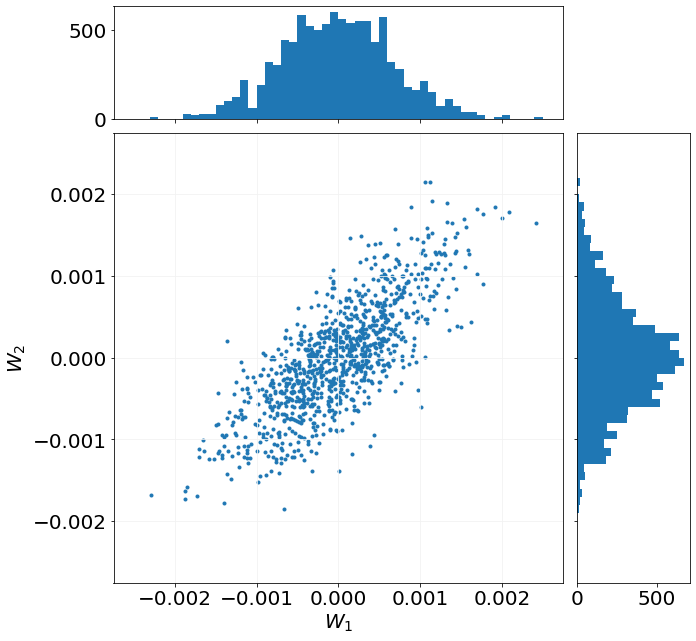

In [5]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)

# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)
plt.show()

## Part 2: Generate bivariate Student's $t_\nu$ samples 

Generate sample of $M$ observations from a chi-square distribution with $\nu$ degrees of freedom

In [6]:
S = rng.chisquare(nu,M)

Combine to generate samples from three bivariate Student’s t_$\nu$ distributions with covariance matrices $\Sigma$.

In [7]:
XP = (np.sqrt(nu) / np.sqrt(S)) * ZP  # to generate t student RVs we have t = sqrt(nu) * Z / sqrt(S)
XM = (np.sqrt(nu) / np.sqrt(S)) * ZM
XZ = (np.sqrt(nu) / np.sqrt(S)) * ZZ

Illustrate the distribution with a scatterplot and marginal histograms. Change the definition of $x$ and $y$ to see the difference between correlation values.

In [8]:
x=XP[0,:]
y=XP[1,:]

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel('$X_1$',fontsize=20)
    ax.set_ylabel('$X_2$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
    # now determine nice limits by hand:
    binwidth = 0.0005
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal',density=True)

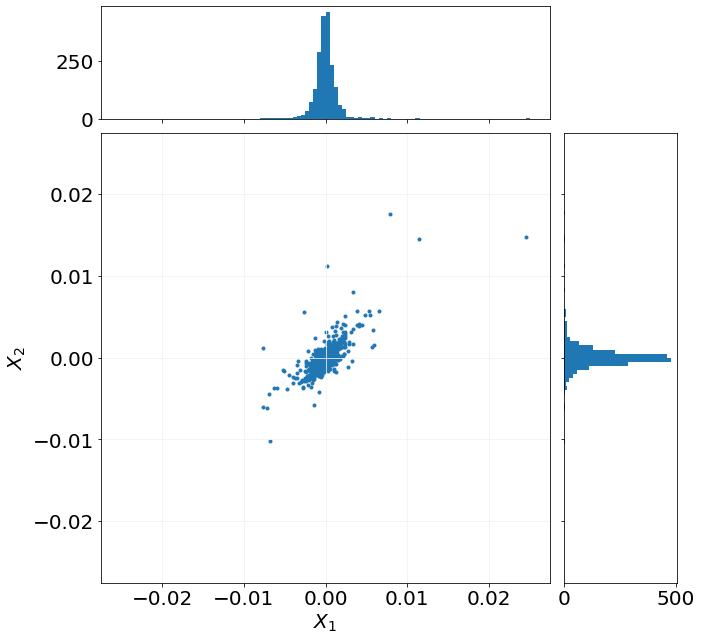

In [9]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)

# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)
plt.show()

## Part 3: The Probability Integral Transform

Generate $M$ samples from a standard normal distribution

In [10]:
Z=rng.normal(0,1,M)

Plot a histogram to show the empirical density

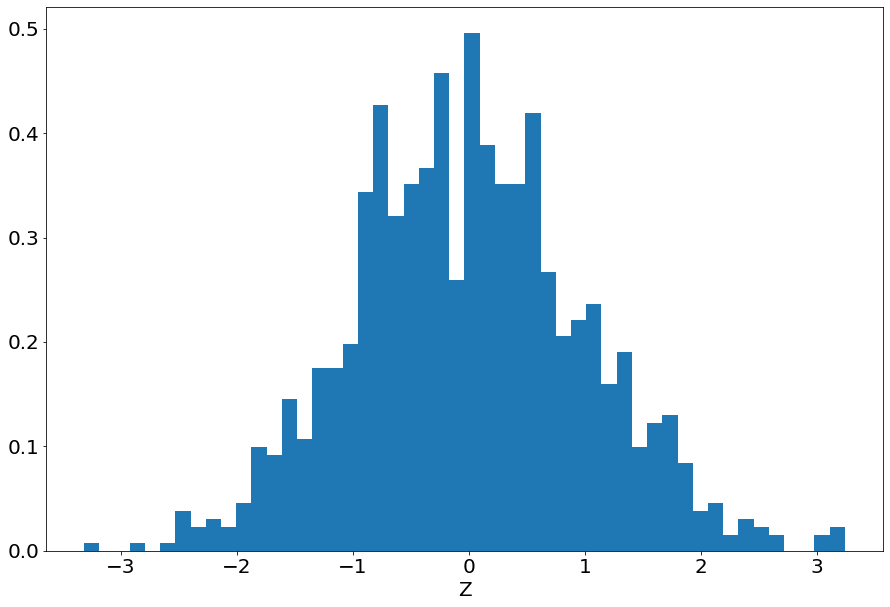

In [11]:
fig, ax1 = plt.subplots(figsize=(15, 10))
plt.hist(Z,bins=50,density=True)
plt.xlabel("Z",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [12]:
U=stats.norm.cdf(Z)

Plot a histogram to show the empirical density

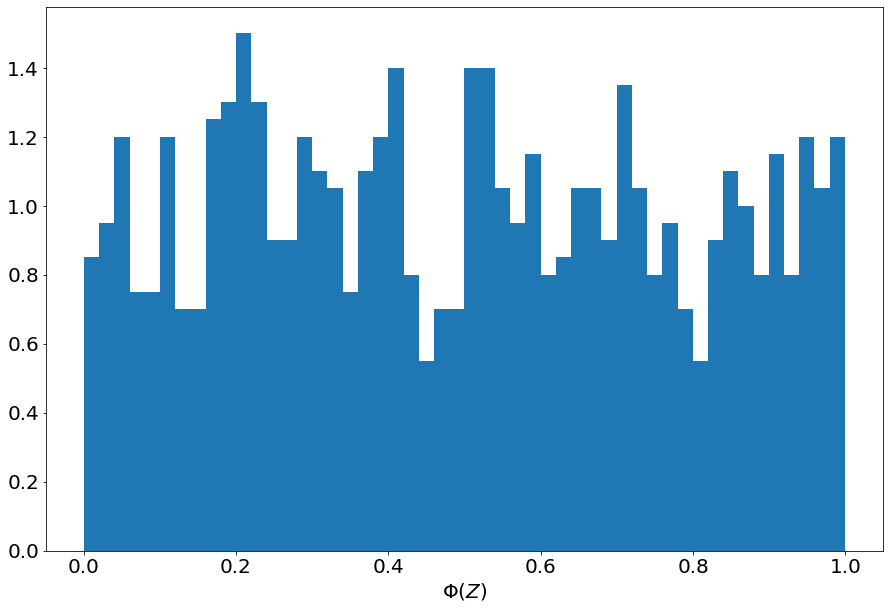

In [13]:
fig, ax1 = plt.subplots(figsize=(15, 10))
plt.hist(U,bins=50,density=True)
plt.xlabel(r"$\Phi(Z)$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## Part 4: The Gaussian copula

Generate samples from a bivariate normal distribution with mean zero and covariance matrix $\Sigma=\begin{pmatrix}1 & \rho\\ \rho & 1\end{pmatrix}$

In [14]:
rhoP=0.8; rhoM=-0.8; rhoZ=0.; M=3*10**3
sigmaP=np.array([[1,rhoP],[rhoP,1]])
sigmaM=np.array([[1,rhoM],[rhoM,1]])
sigmaZ=np.array([[1,rhoZ],[rhoZ,1]])
AP=np.linalg.cholesky(sigmaP)
AM=np.linalg.cholesky(sigmaM)
AZ=np.linalg.cholesky(sigmaZ)
Z=rng.normal(0,1,(2,M))

WP=AP.dot(Z)
WM=AM.dot(Z)
WZ=AZ.dot(Z)

Apply $\Phi$ to the marginal data of our bivariate Gaussian sample. By the Probability Integral Transform, this has the effect of making the marginal data uniform while leaving the covariance structure intact.  

In [15]:
# Negative correlation
WMCDF1=stats.norm.cdf(WM[0,:])
WMCDF2=stats.norm.cdf(WM[1,:])

# Positive correlation
WPCDF1=stats.norm.cdf(WP[0,:])
WPCDF2=stats.norm.cdf(WP[1,:])

# Zero correlation
WZCDF1=stats.norm.cdf(WZ[0,:])
WZCDF2=stats.norm.cdf(WZ[1,:])

Plot the resulting bivariate distribution.

In [16]:
x=WPCDF1
y=WPCDF2

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel(r'$\Phi(W_1(1))$',fontsize=20)
    ax.set_ylabel(r'$\Phi(W_2(1))$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
    # now determine nice limits by hand:
    binwidth = 0.04
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal',density=True)

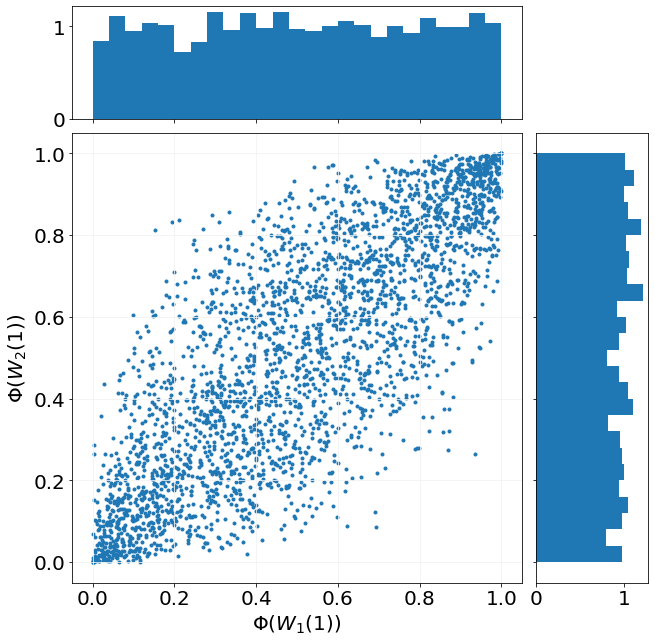

In [17]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)

# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

We can apply the dependency structure captured by the Gaussian copula to Student's t distributed marginal data, using the t.ppf() call from the stats library, which returns a value from the inverse CDF of the Student's $t$ distribution.

In [18]:
x=stats.t.ppf(WMCDF1,df=5)
y=stats.t.ppf(WMCDF2,df=5)

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel(r'$F_{t_5}^{-1}(\Phi(X_1))$',fontsize=20)
    ax.set_ylabel(r'$F_{t_5}^{-1}(\Phi(X_2))$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal',density=True)

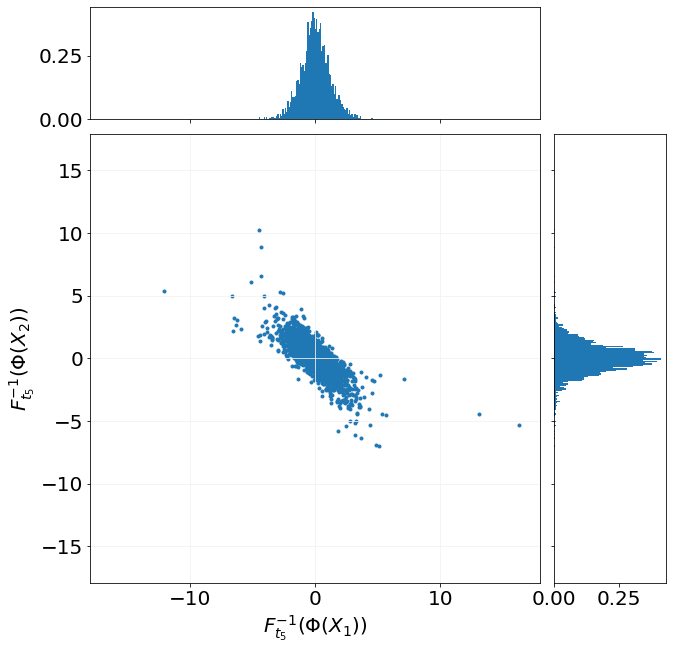

In [19]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)


# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)
plt.savefig('GCT5MrhoMinus0p8.eps', format='eps',bbox_inches='tight')

We can apply the dependency structure captured by the Gaussian copula to exponentially distributed marginal data, using the expon.ppf() call from the stats library, which returns a value from the inverse CDF of exponential  distribution.

In [20]:
x=stats.expon.ppf(WPCDF1)
y=stats.expon.ppf(WPCDF2)

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel(r'$F_{Exp}^{-1}(\Phi(X_1))$',fontsize=20)
    ax.set_ylabel(r'$F_{Exp}^{-1}(\Phi(X_2))$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal',density=True)

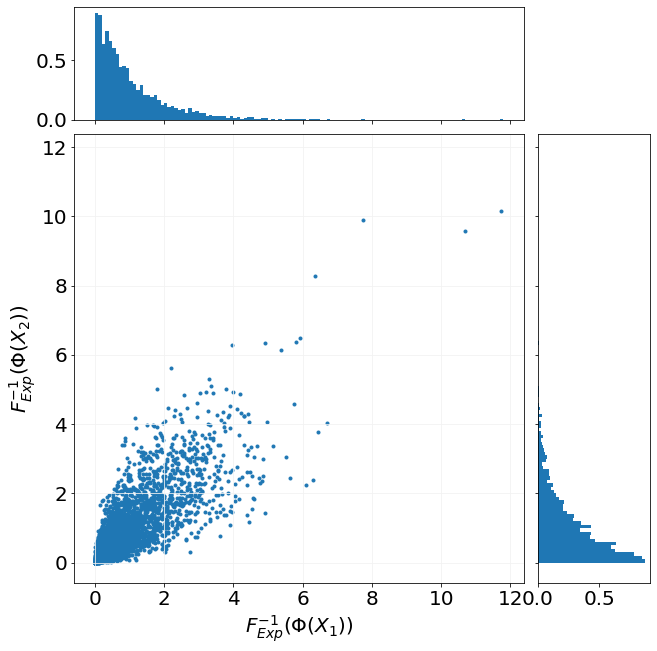

In [21]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)


# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)
plt.savefig('GCExpMrho0p8.eps', format='eps')

## Part 5: The Student Copula

We will reuse the samples from a Student's $t_\nu$ distribution from earlier in the notebook. XM and XP contain samples with negative and positive linear correlation respectively.

First, apply the CDF of the $t_\nu$ distribution to the marginals of these samples in order to uniformise them via the Probability Integral Transform

In [22]:
# Negative correlation
XMCDF1=stats.t.cdf(XM[0,:],df=nu,loc=0,scale=np.sqrt(SigmaM[0,0]))
XMCDF2=stats.t.cdf(XM[1,:],df=nu,loc=0,scale=np.sqrt(SigmaM[1,1]))

# Positive correlation
XPCDF1=stats.t.cdf(XP[0,:],df=nu,loc=0,scale=np.sqrt(SigmaP[0,0]))
XPCDF2=stats.t.cdf(XP[1,:],df=nu,loc=0,scale=np.sqrt(SigmaP[1,1]))

Plot a scatterplot of the sample pairs and marginal histograms

In [23]:
x=XMCDF1
y=XMCDF2

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel(r'$F_{t_\nu}(X_1)$',fontsize=20)
    ax.set_ylabel(r'$F_{t_\nu}(X_2)$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
    # now determine nice limits by hand:
    binwidth = 0.01
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal',density=True)

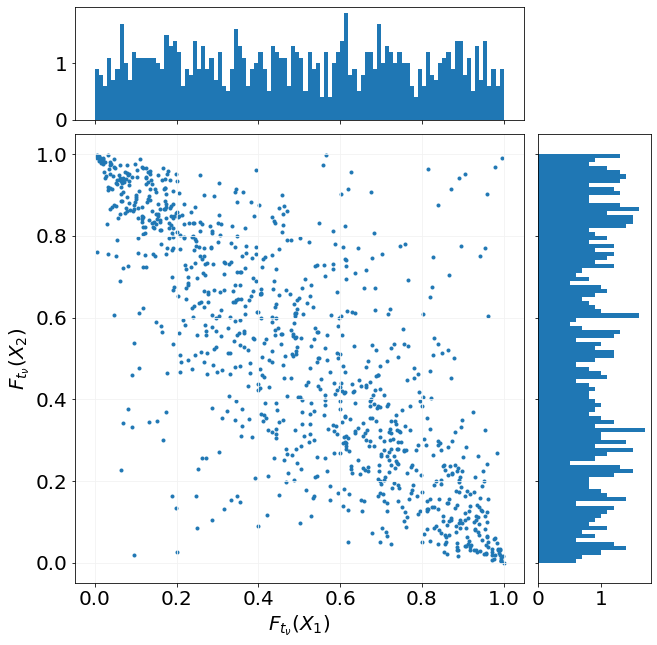

In [24]:
# Start with a square Figure.
fig = plt.figure(figsize=(10, 10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)


# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

Now apply the inverse CDF of a Normal distribution to produce a bivariate distribution with standard Normal marginal data and the dependency structure of a bivariate Student's $t_\nu$ distribution

In [25]:
x=stats.norm.ppf(XPCDF1)
y=stats.norm.ppf(XPCDF2)

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel(r'$\Phi^{-1}(F_{t_\nu}(X_1))$',fontsize=20)
    ax.set_ylabel(r'$\Phi^{-1}(F_{t_\nu}(X_2))$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal',density=True)

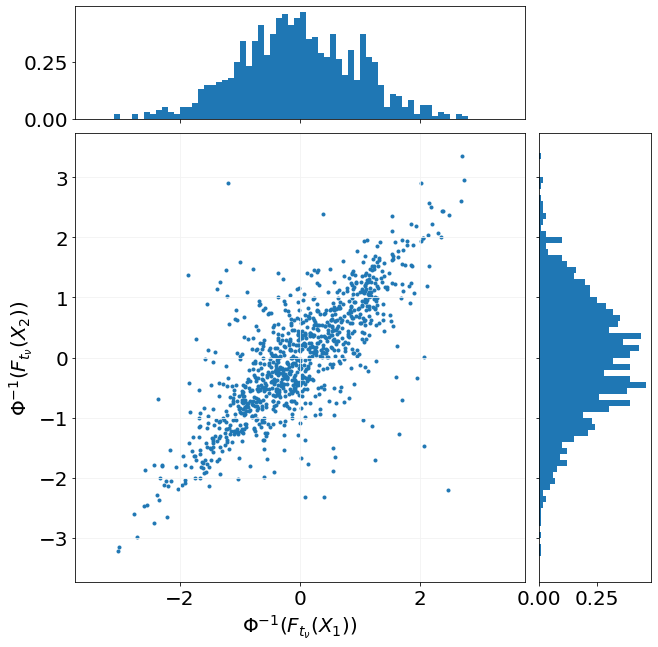

In [27]:
# Start with a square Figure.
fig = plt.figure(figsize=(10, 10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)


# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

Now apply the inverse CDF of an exponential distribution with rate parameter $1$ to produce a bivariate distribution with exponential marginal data and the dependency structure of a bivariate Student's $t_\nu$ distribution

In [28]:
x=stats.expon.ppf(XMCDF1)
y=stats.expon.ppf(XMCDF2)

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel(r'$F_{Exp}^{-1}(F_{t_\nu}(X_1))$',fontsize=20)
    ax.set_ylabel(r'$F_{Exp}^{-1}(F_{t_\nu}(X_2))$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal',density=True)

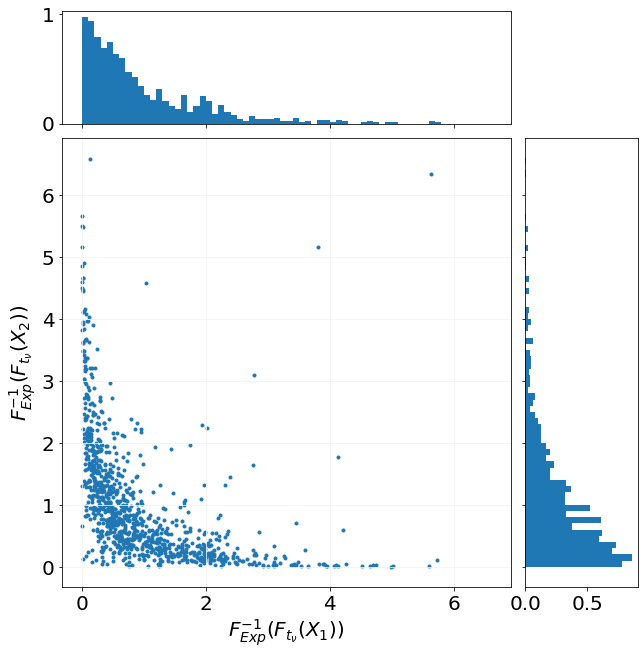

In [29]:
# Start with a square Figure.
fig = plt.figure(figsize=(10, 10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)


# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

## Part 6: Tail dependence

Recall that the upper tail dependence of a bivariate Student copula with $R=0$ is given by
$\lambda_U=2\left(1-t_{\nu+1}(\sqrt{\nu+1})\right)$.

In [30]:
2*(1-stats.t.cdf(np.sqrt(6),df=6))

0.04982526278057664

This is nonzero, even when there is non linear correlation between the marginals.